In [1]:
# Replicate a Python visualization based on a chart

In [2]:
import pandas as pd

In [3]:
# Let's try reading the data in..
movies = pd.read_csv("P4-Section6-Homework-Dataset.csv")

UnicodeDecodeError: 'utf-8' codec can't decode byte 0x88 in position 14: invalid start byte

In [4]:
# Let's try find out which encoding the file is using
import chardet
with open("P4-Section6-Homework-Dataset.csv", 'rb') as rawdata:
    result = chardet.detect(rawdata.read(100000))
result

{'encoding': 'Windows-1252', 'confidence': 0.73, 'language': ''}

In [5]:
# Let's try if reading works by using the likely encoding:
movies = pd.read_csv("P4-Section6-Homework-Dataset.csv", delimiter=",", encoding='Windows-1252')

In [6]:
# Great! We got the data! Let's have a look.
movies.head()

,Day of Week,Director,Genre,Movie Title,Release Date,Studio,Adjusted Gross ($mill),Budget ($mill),Gross ($mill),IMDb Rating,MovieLens Rating,Overseas ($mill),Overseas%,Profit ($mill),Profit%,Runtime (min),US ($mill),Gross % US
0,Friday,Brad Bird,action,Tomorrowland,22/05/2015,Buena Vista Studios,202.1,170.0,202.1,6.7,3.26,111.9,55.4,32.1,18.9,130,90.2,44.6
1,Friday,Scott Waugh,action,Need for Speed,14/03/2014,Buena Vista Studios,204.2,66.0,203.3,6.6,2.97,159.7,78.6,137.3,208.0,132,43.6,21.4
2,Friday,Patrick Hughes,action,The Expendables 3,15/08/2014,Lionsgate,207.1,100.0,206.2,6.1,2.93,166.9,80.9,106.2,106.2,126,39.3,19.1
3,Friday,"Phil Lord, Chris Miller",comedy,21 Jump Street,16/03/2012,Sony,208.8,42.0,201.6,7.2,3.62,63.1,31.3,159.6,380.0,109,138.4,68.7
4,Friday,Roland Emmerich,action,White House Down,28/06/2013,Sony,209.7,150.0,205.4,8.0,3.65,132.3,64.4,55.4,36.9,131,73.1,35.6


In [7]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 608 entries, 0 to 607
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Day of Week             608 non-null    object 
 1   Director                608 non-null    object 
 2   Genre                   608 non-null    object 
 3   Movie Title             608 non-null    object 
 4   Release Date            608 non-null    object 
 5   Studio                  608 non-null    object 
 6   Adjusted Gross ($mill)  608 non-null    object 
 7   Budget ($mill)          608 non-null    float64
 8   Gross ($mill)           608 non-null    object 
 9   IMDb Rating             608 non-null    float64
 10  MovieLens Rating        608 non-null    float64
 11  Overseas ($mill)        608 non-null    object 
 12  Overseas%               608 non-null    float64
 13  Profit ($mill)          608 non-null    object 
 14  Profit%                 608 non-null    fl

In [8]:
# How many movies does the data include?
len(movies)

608

In [9]:
movies.columns

Index(['Day of Week', 'Director', 'Genre', 'Movie Title', 'Release Date',
       'Studio', 'Adjusted Gross ($mill)', 'Budget ($mill)', 'Gross ($mill)',
       'IMDb Rating', 'MovieLens Rating', 'Overseas ($mill)', 'Overseas%',
       'Profit ($mill)', 'Profit%', 'Runtime (min)', 'US ($mill)',
       'Gross % US'],
      dtype='object')

In [10]:
# Let's rename the columns to ease working with the data
movies.columns = ['WeekDay', 'Director', 'Genre', 'Movie', 'ReleaseDate',
       'Studio', 'AdjustedGrossMillions', 'BudgetMillions', 'GrossMillions',
       'IMDbRating', 'MovieLensRating', 'OverseasMillions', 'OverseasPercentage',
       'ProfitMillions', 'ProfitPercentage', 'Runtime', 'USMillions',
       'GrossPercentageUS']

In [11]:
movies.columns

Index(['WeekDay', 'Director', 'Genre', 'Movie', 'ReleaseDate', 'Studio',
       'AdjustedGrossMillions', 'BudgetMillions', 'GrossMillions',
       'IMDbRating', 'MovieLensRating', 'OverseasMillions',
       'OverseasPercentage', 'ProfitMillions', 'ProfitPercentage', 'Runtime',
       'USMillions', 'GrossPercentageUS'],
      dtype='object')

In [12]:
# Let's import Seaborn for creting the visualization
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
# I don't want to be hiding warnings as they often have useful info:
# import warnings
# warnings.filterwarnings('ignore')

In [13]:
# There seemed to be more studios in the data than what were on the visualization.
# Let's list the studios found in the data:
movies.Studio.unique()

array(['Buena Vista Studios', 'Lionsgate', 'Sony', 'Universal',
       'Paramount Pictures', 'WB', 'Weinstein Company',
       'UA Entertainment', 'WB/New Line', 'New Line Cinema', 'Fox',
       'TriStar', 'Relativity Media', 'Screen Gems', 'StudioCanal',
       'Fox Searchlight Pictures', 'MiraMax', 'Path_ Distribution',
       'DreamWorks', 'Lionsgate Films', 'Revolution Studios',
       'Dimension Films', 'USA', 'Lionsgate/Summit',
       'Sony Picture Classics', 'Pacific Data/DreamWorks', 'Disney',
       'Art House Studios', 'Colombia Pictures', 'Gramercy Pictures',
       'Summit Entertainment', 'Vestron Pictures', 'MGM', 'Orion', 'IFC',
       'New Market Films'], dtype=object)

In [14]:
# Let's also list the Genres as only some of them were used in the visualization:
movies.Genre.unique()

array(['action', 'comedy', 'adventure', 'horror', 'animation',
       'biography', 'drama', 'musical', 'sci-fi', 'crime', 'romance',
       'fantasy', 'mystery', 'thriller', 'documentary'], dtype=object)

In [15]:
# I will need filters for selecting the rows (movies) which were from the
# selected genres and studios.
# It's easy to copy them from the lists above.
GenreFilter = (
    (movies.Genre == 'action') | \
    (movies.Genre == 'comedy') | \
    (movies.Genre == 'adventure') | \
    (movies.Genre == 'animation') | \
    (movies.Genre == 'drama'))
print(GenreFilter.head())
StudioFilter = (
    (movies.Studio == 'Buena Vista Studios') | \
    (movies.Studio == 'Sony') | \
    (movies.Studio == 'Universal') | \
    (movies.Studio == 'WB') | \
    (movies.Studio == 'Paramount Pictures') | \
    (movies.Studio == 'Fox'))
print(StudioFilter.head())

0    True
1    True
2    True
3    True
4    True
Name: Genre, dtype: bool
0     True
1     True
2    False
3     True
4     True
Name: Studio, dtype: bool


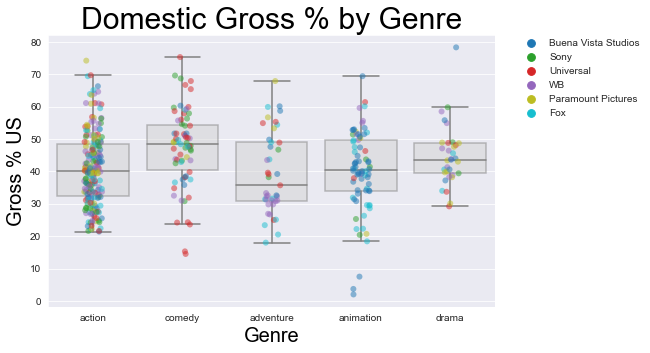

In [16]:
# Here I'm creating the two plots which were overlayed in the original visualization
# The other is a boxplot and the other a stripplot
sns.set_style("darkgrid")
sns.set_palette("muted")
fig, ax = plt.subplots(1,1)
fig.set_size_inches(8, 5)

w = sns.boxplot(data= \
                movies[GenreFilter & StudioFilter], \
                x='Genre', \
                y='GrossPercentageUS', \
                color='lightgray', \
                showfliers=False)
plt.setp(ax.artists, alpha=0.5)
vis1 = sns.stripplot(data= \
                     movies[GenreFilter & StudioFilter], \
                     x='Genre', y='GrossPercentageUS', \
                     hue='Studio', alpha=0.5, size=6, jitter=True, \
                     palette=["tab:blue","tab:green","tab:red","tab:purple","tab:olive","tab:cyan"])
ax.axes.set_title("Domestic Gross % by Genre", fontsize=30, \
         color="Black")
ax.set_ylabel("Gross % US", fontsize=20, color="Black")
ax.set_xlabel("Genre", fontsize=20, color="Black")

ax.legend(bbox_to_anchor=(1.05, 1), loc=2, frameon=False, borderaxespad=0.)
plt.show()